<a href="https://colab.research.google.com/github/mohith789p/Machine-Learning/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the Dataset and Checking its Dimensions

In [91]:
import pandas as pd
data = pd.read_csv('/content/Student Depression Dataset.csv')
data.shape

(27901, 18)

# Displaying Dataset Information

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

# Generating Descriptive Statistics

In [93]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


# Checking for Missing Values

In [94]:
n_missing_values = data.isnull().sum()
print(n_missing_values)

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


# Checking for Duplicate Values

In [95]:
n_dublicates = data.duplicated().sum()
print(n_dublicates)

0


# Selecting Numerical Data

In [96]:
numerical_data = data.select_dtypes(include=['number'])

# Plotting Correlation Heatmap

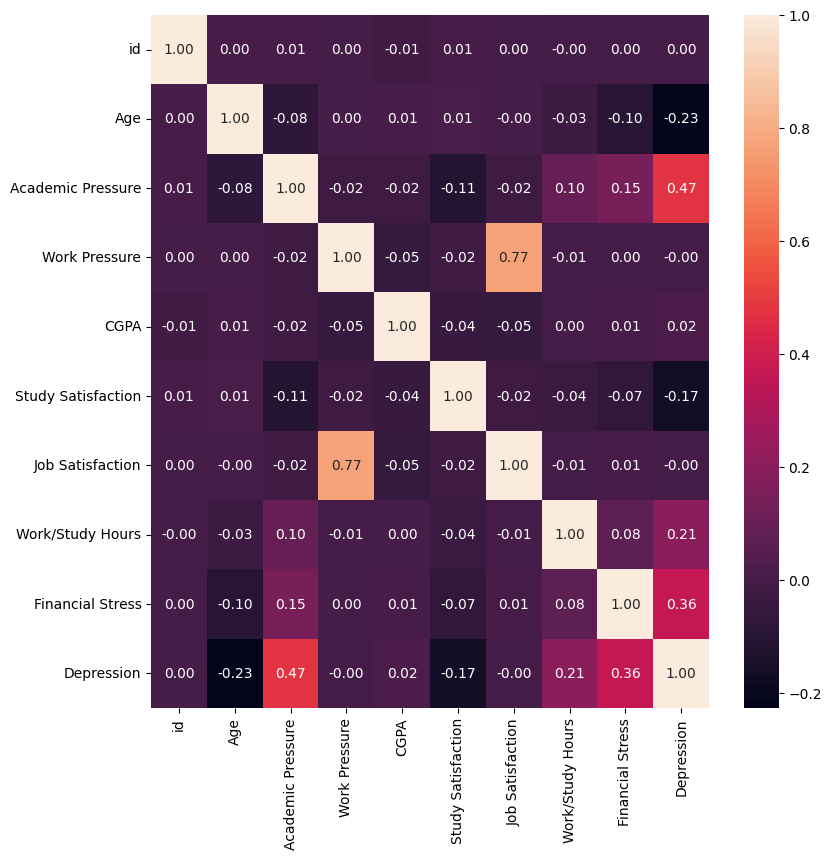

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
sns.heatmap(numerical_data.corr(), annot=True, fmt='.2f')
plt.show()

# Plotting Boxplots for Numerical Columns

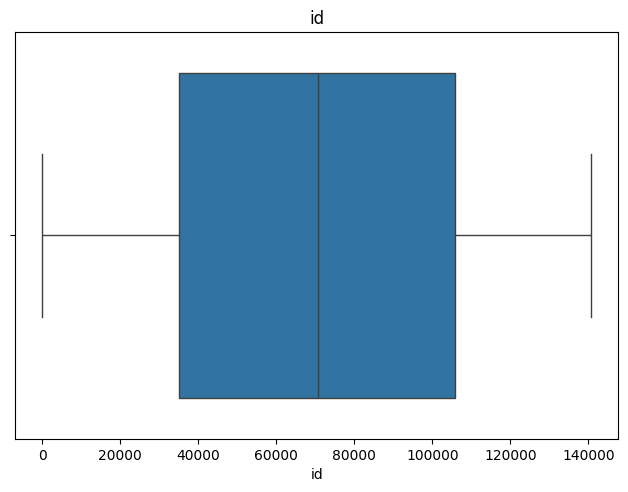

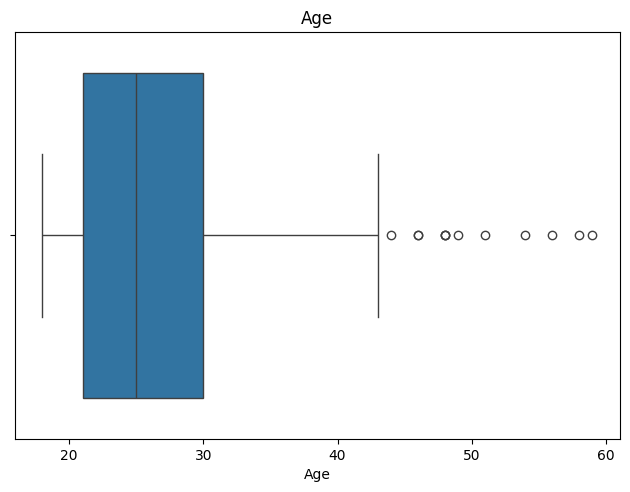

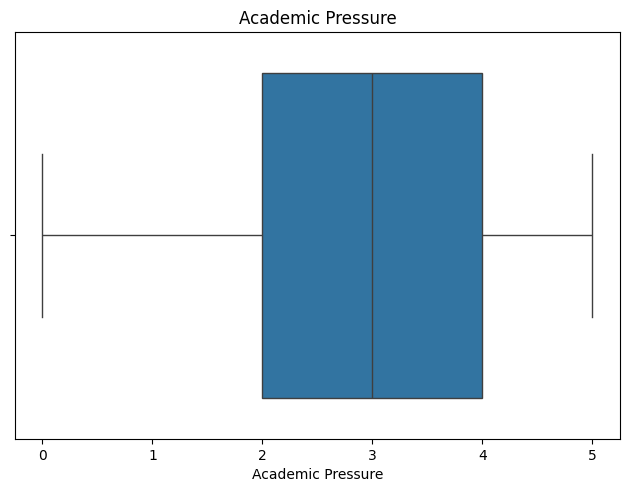

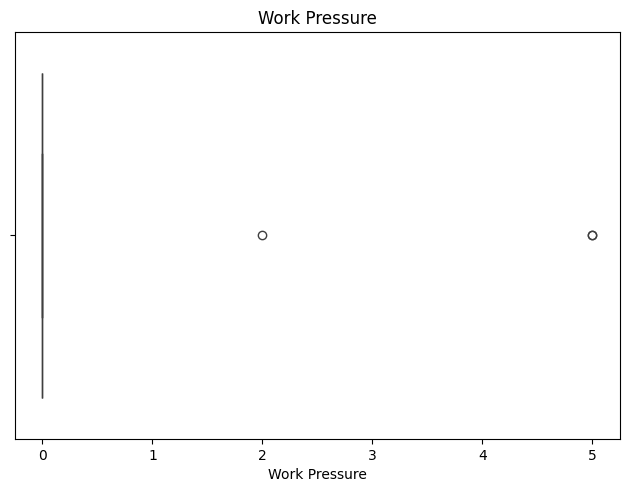

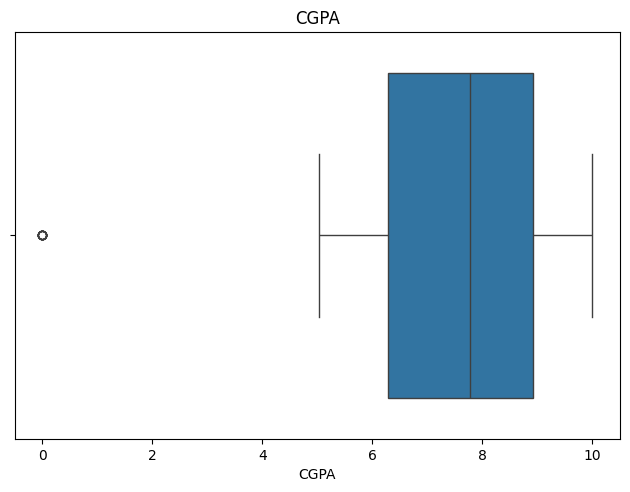

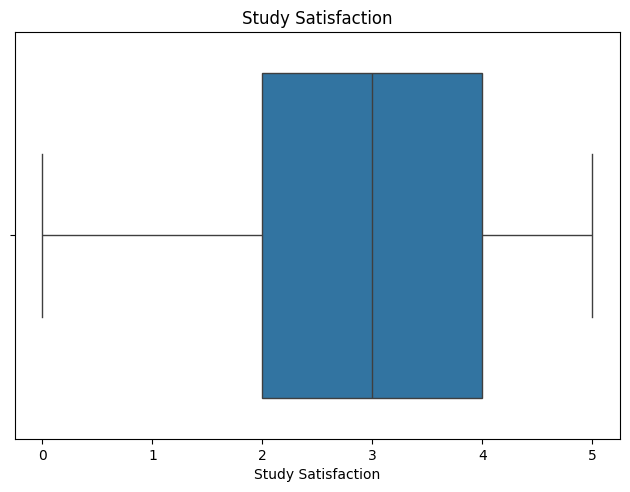

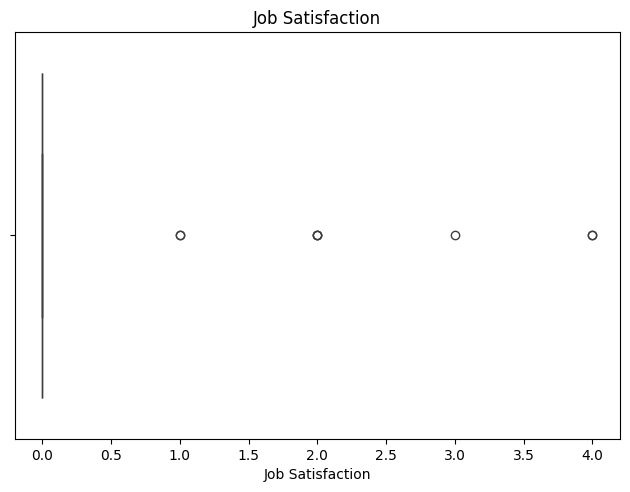

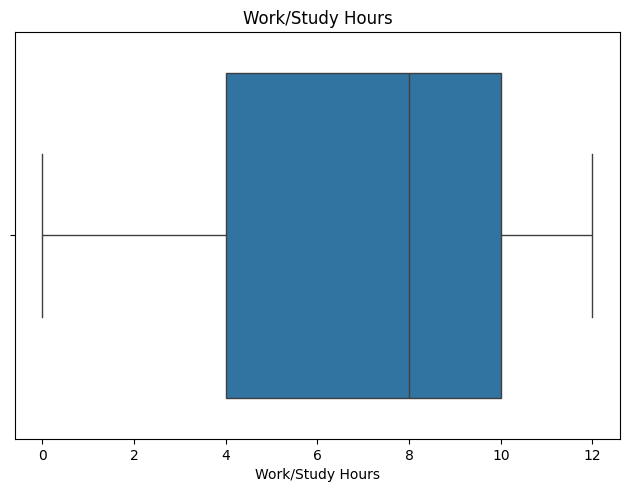

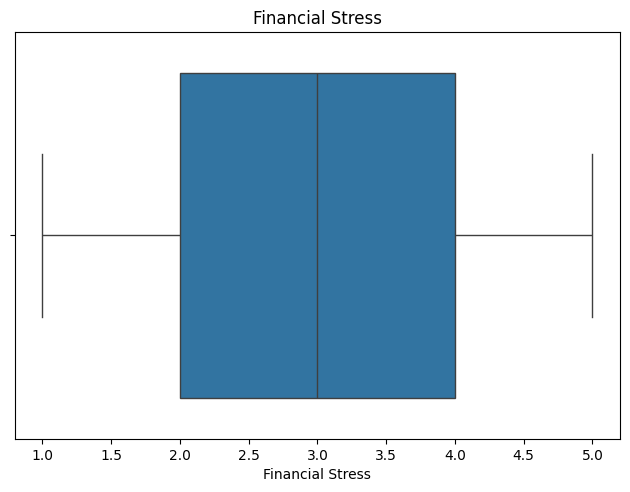

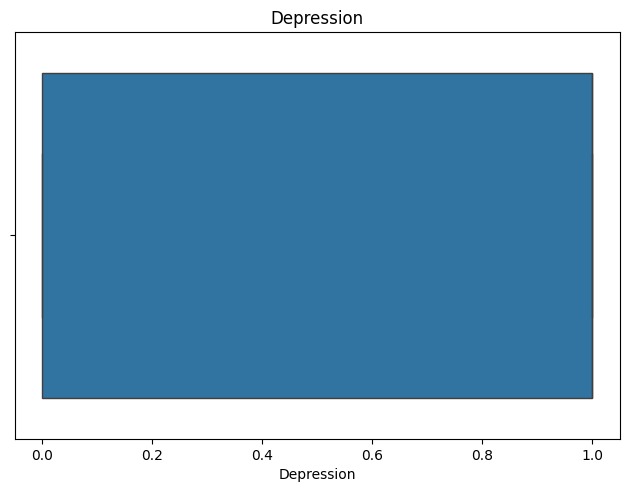

In [98]:
for col in numerical_data.columns:
    sns.boxplot(x=data[col])
    plt.tight_layout()
    plt.title(col)
    plt.show()

# Plotting Countplots for Categorical Columns

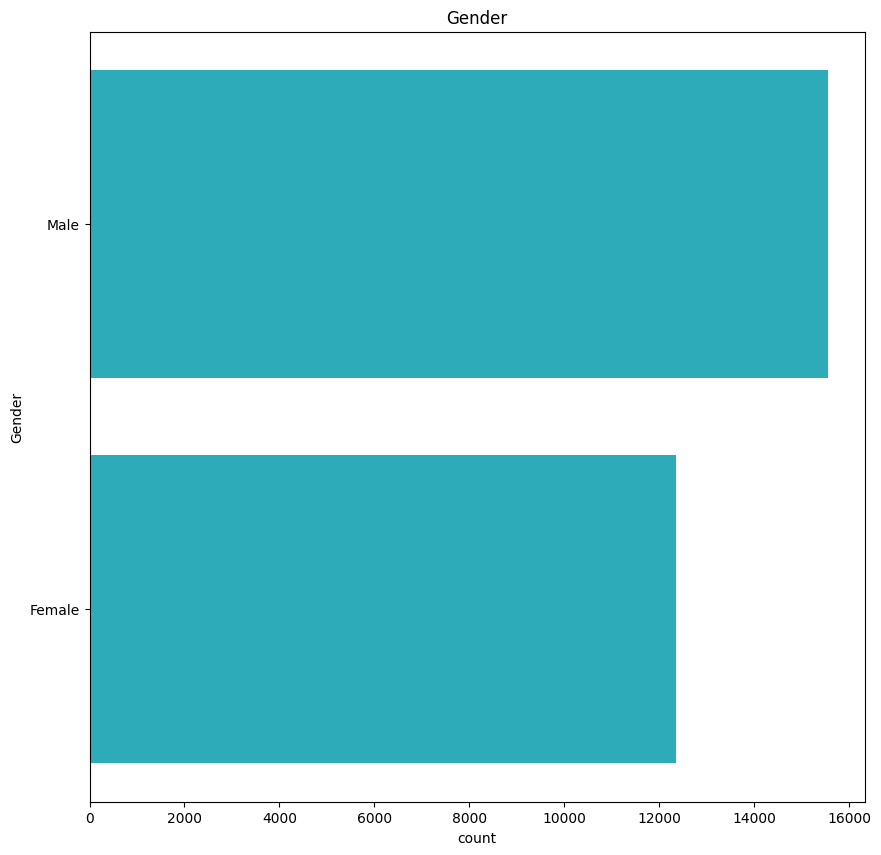

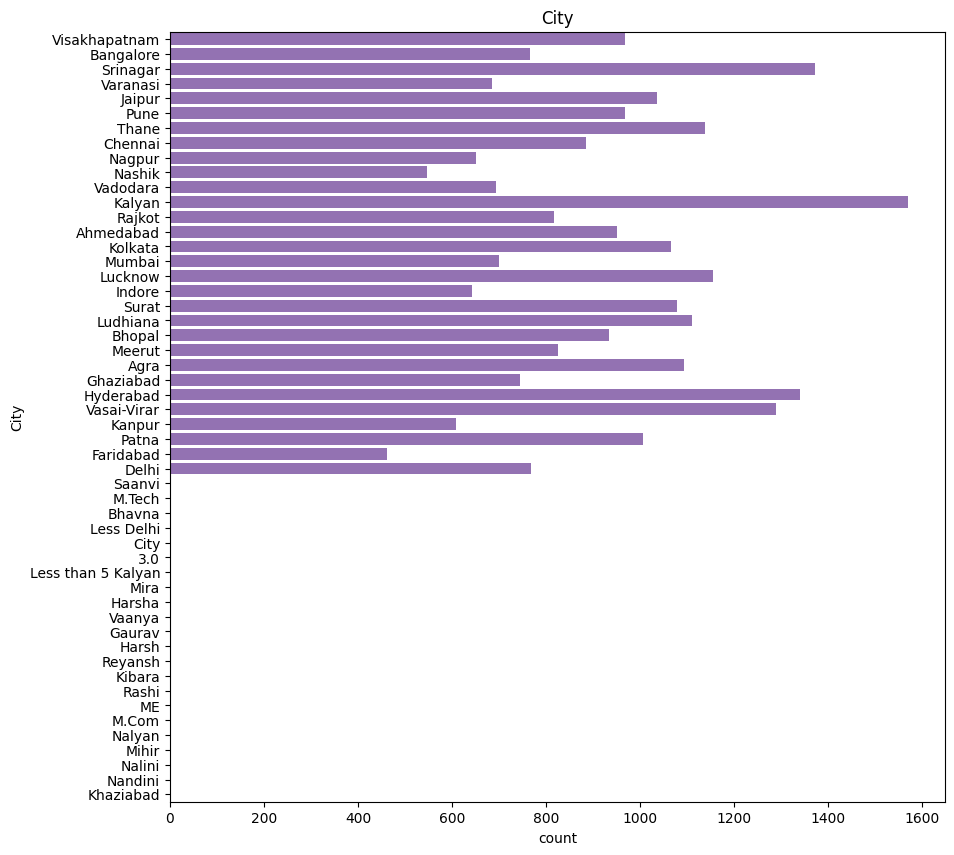

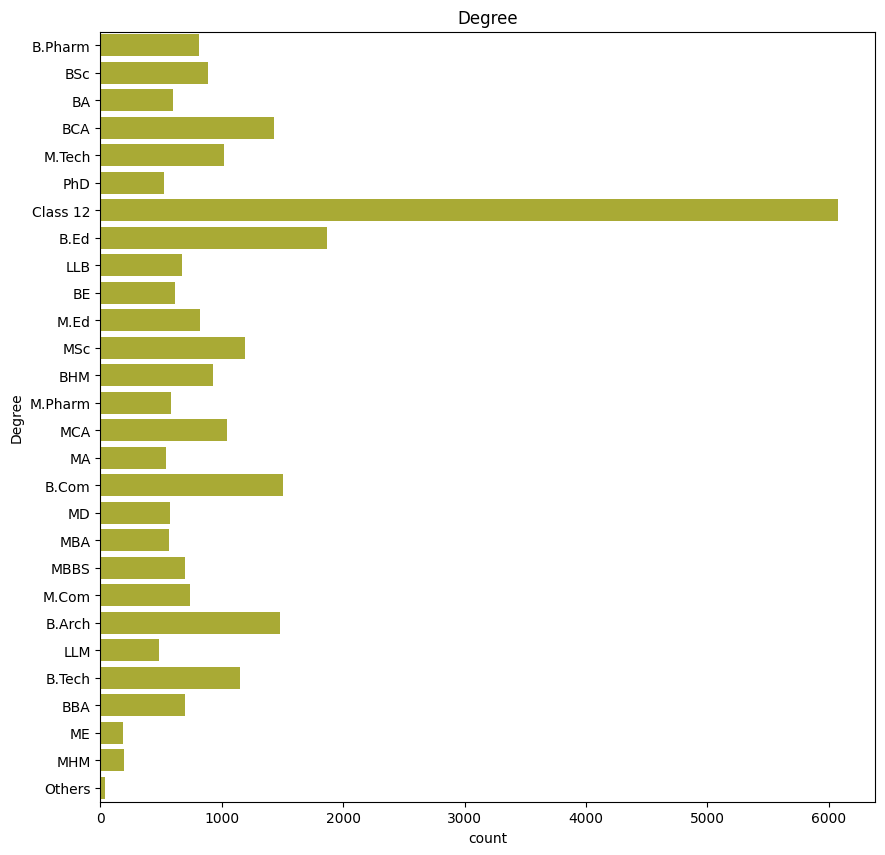

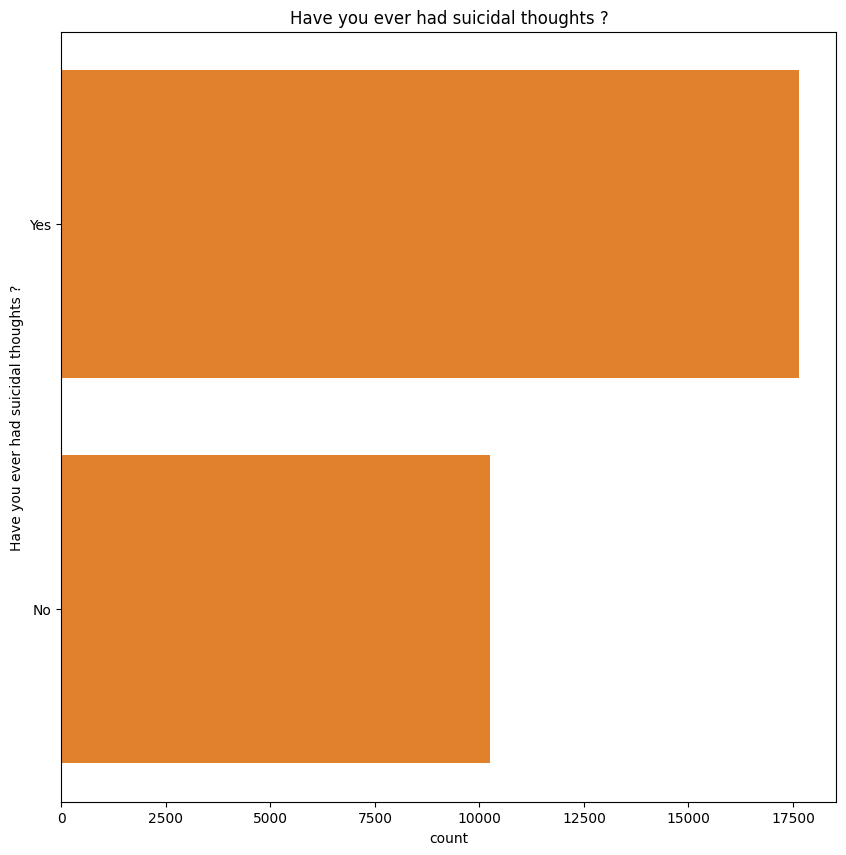

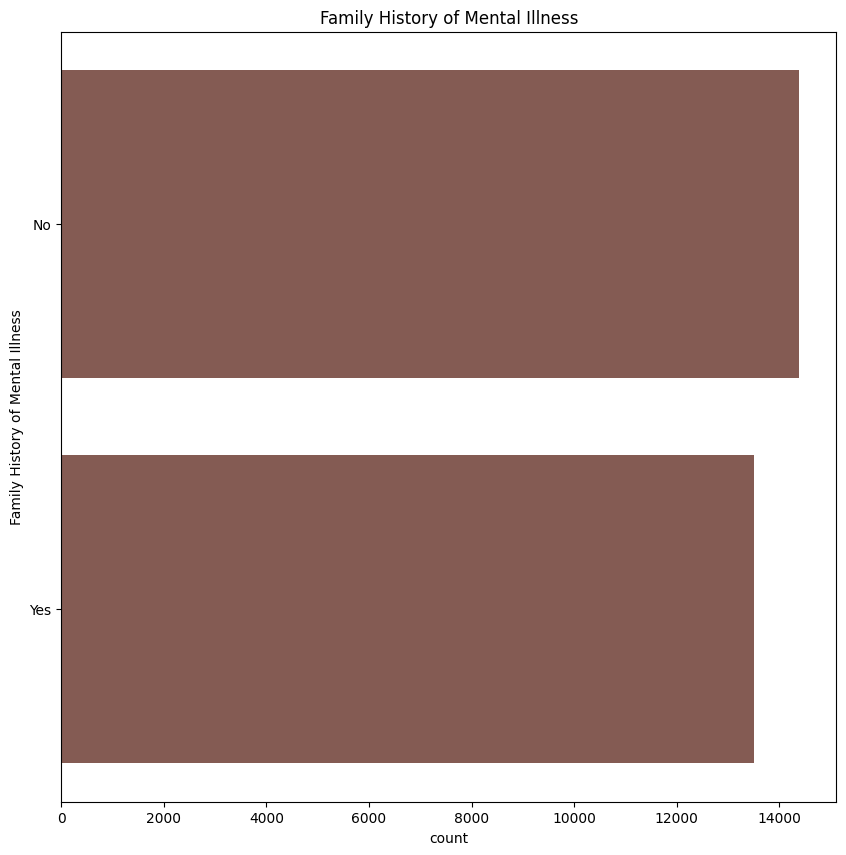

In [99]:
import random
cols = ['Gender','City','Degree','Have you ever had suicidal thoughts ?','Family History of Mental Illness']
for col in cols:
    plt.figure(figsize=(10,10))
    sns.countplot(y=data[col],color=random.choice(sns.color_palette()))
    plt.title(col)
    plt.show()

# Analyzing Correlation with `Depression`


In [100]:
correlation = numerical_data.corr()['Depression'].sort_values(ascending=False)
correlation_columns = correlation.index.difference(['Depression','id'])
correlation

,Depression
Depression,1.000000
Academic Pressure,0.474835
Financial Stress,0.363591
Work/Study Hours,0.208563
CGPA,0.022210
id,0.000923
Work Pressure,-0.003351
Job Satisfaction,-0.003482
Study Satisfaction,-0.167971
Age,-0.226422


# Plotting Regression Plots for Correlated Columns


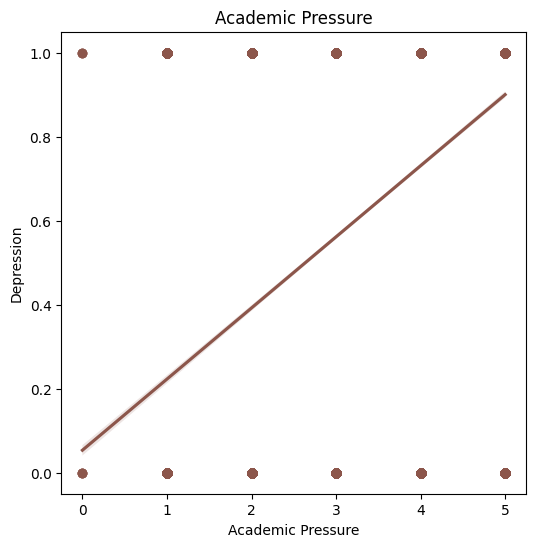

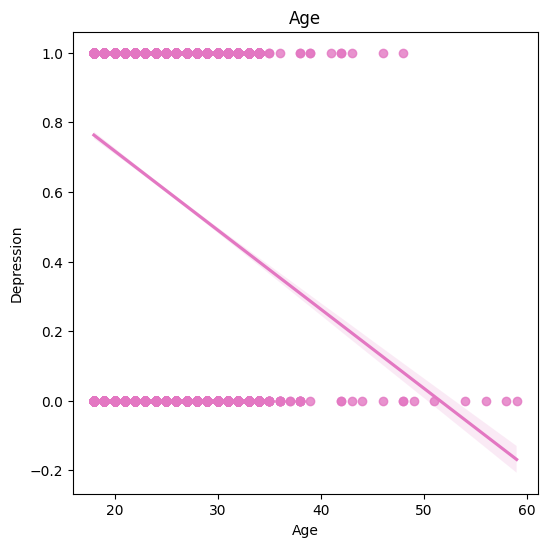

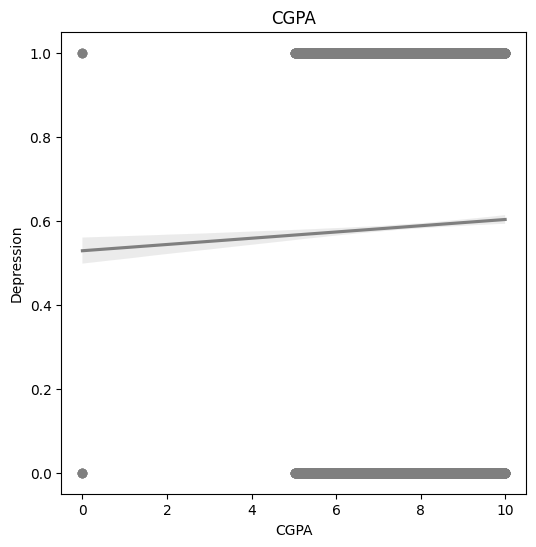

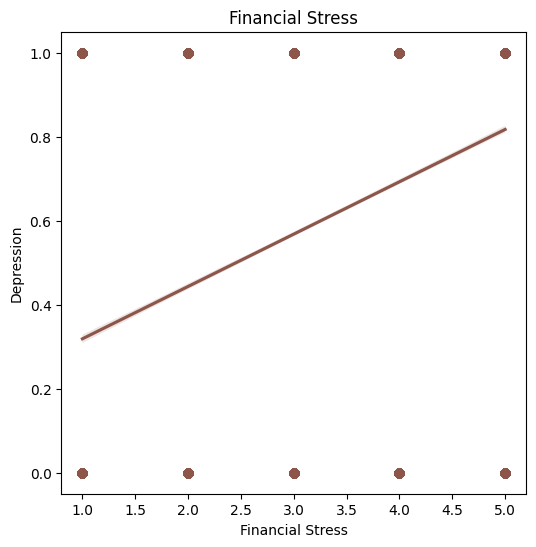

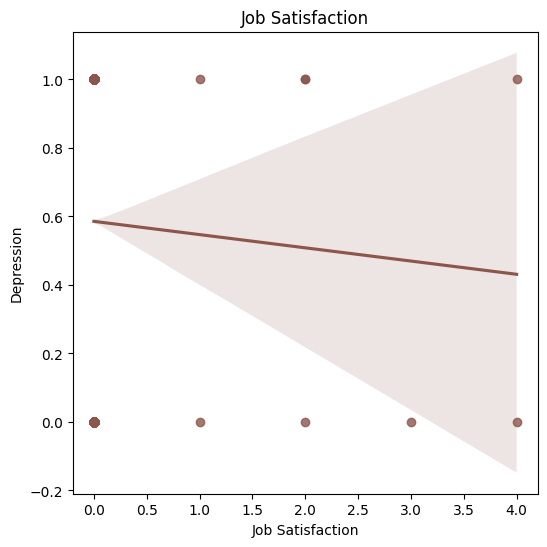

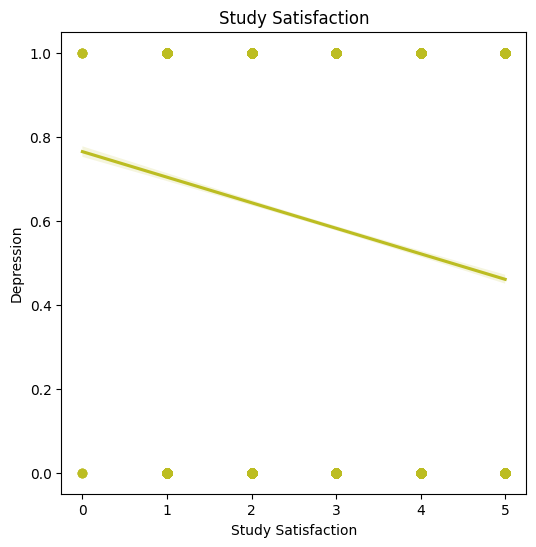

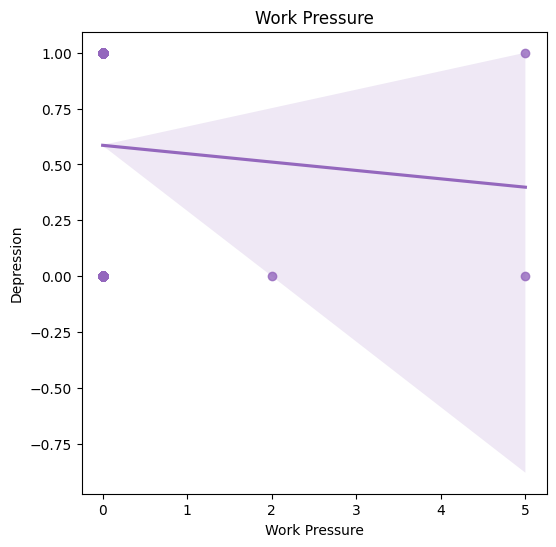

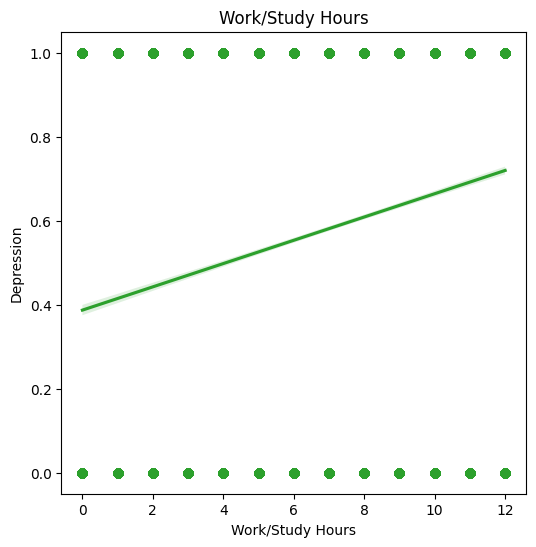

In [101]:
for col in correlation_columns:
    plt.figure(figsize=(6,6))
    sns.regplot(data=data,x=col,y='Depression', color=random.choice(sns.color_palette()))
    plt.title(col)
    plt.show()